In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("/content/Netflix.csv")
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
df.dropna(subset=['Country','Release_Date','Rating','Duration'], inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year_Added'] = df['Release_Date'].dt.year


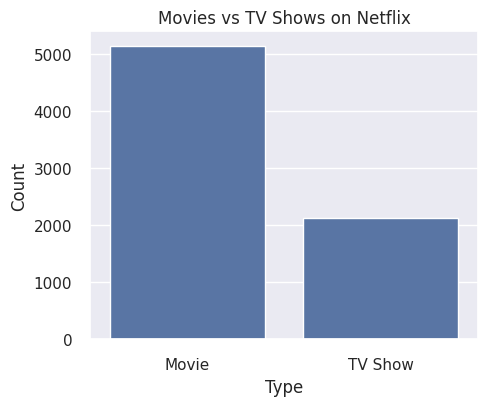

In [12]:
type_count = df['Category'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=type_count.index, y=type_count.values)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


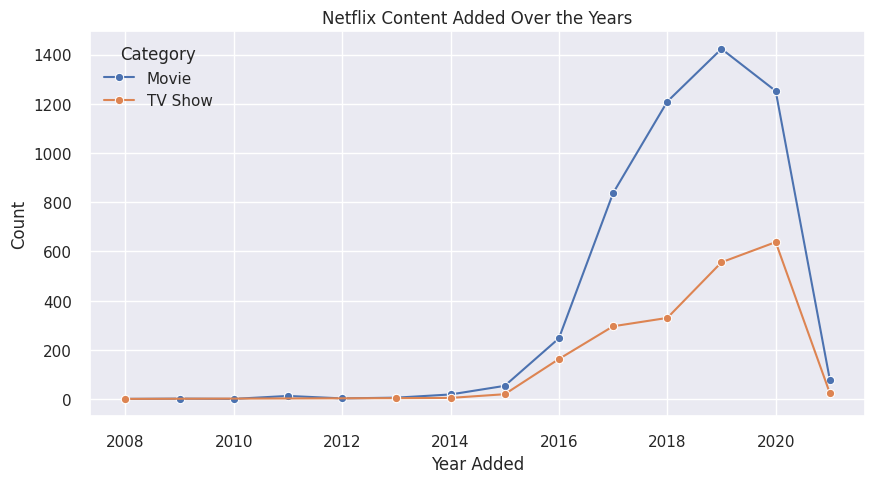

In [13]:
content_by_year = df.groupby(['Year_Added','Category']).size().reset_index(name='count')
plt.figure(figsize=(10,5))
sns.lineplot(x='Year_Added', y='count', hue='Category', data=content_by_year, marker="o")
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()


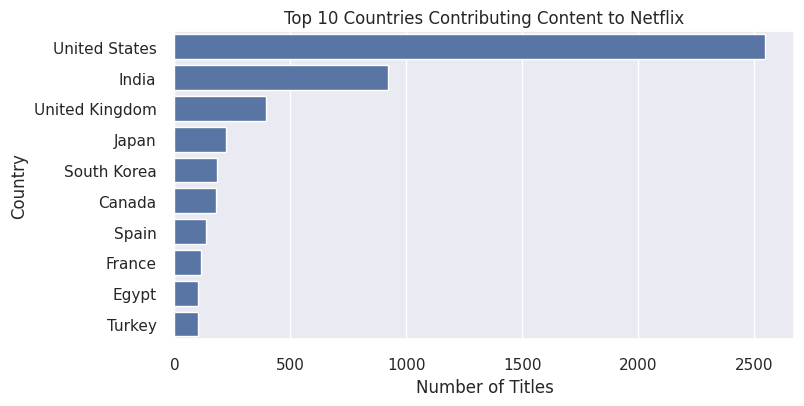

In [14]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Contributing Content to Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


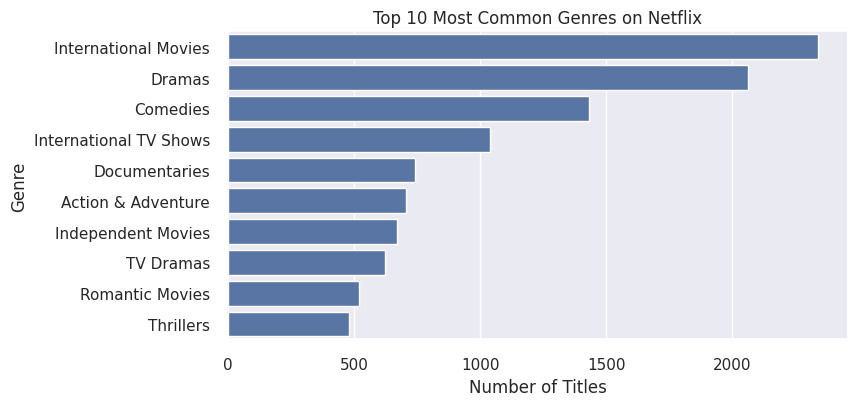

In [15]:
df['Type'] = df['Type'].astype(str)
genres = df['Type'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=genres.values, y=genres.index)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


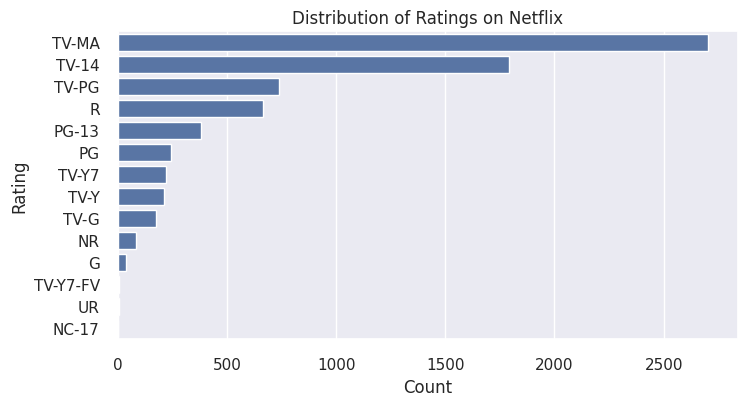

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index)
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


/tmp/ipython-input-2603160982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Duration_Num'] = movies['Duration'].str.replace(' min','').astype(float)


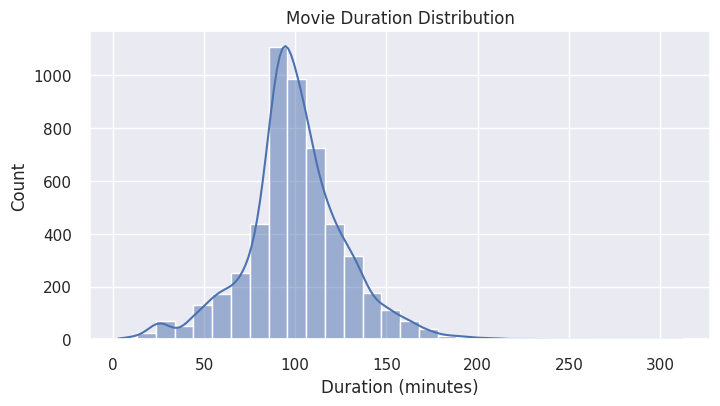

In [17]:
movies = df[df['Category'] == 'Movie']
movies['Duration_Num'] = movies['Duration'].str.replace(' min','').astype(float)
plt.figure(figsize=(8,4))
sns.histplot(movies['Duration_Num'], bins=30, kde=True)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()



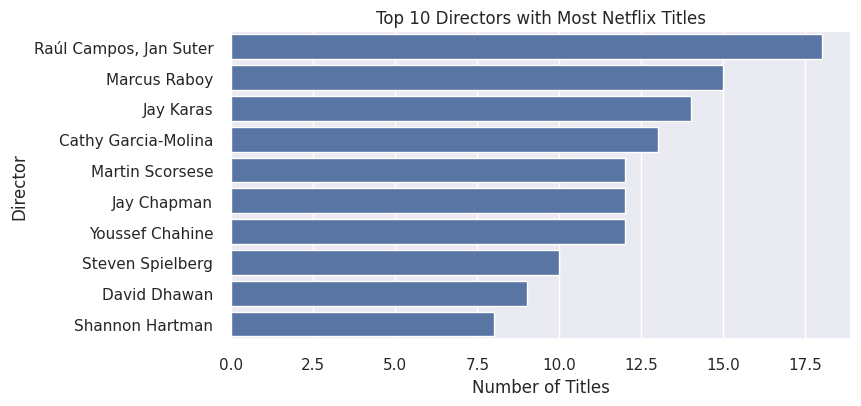

In [18]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


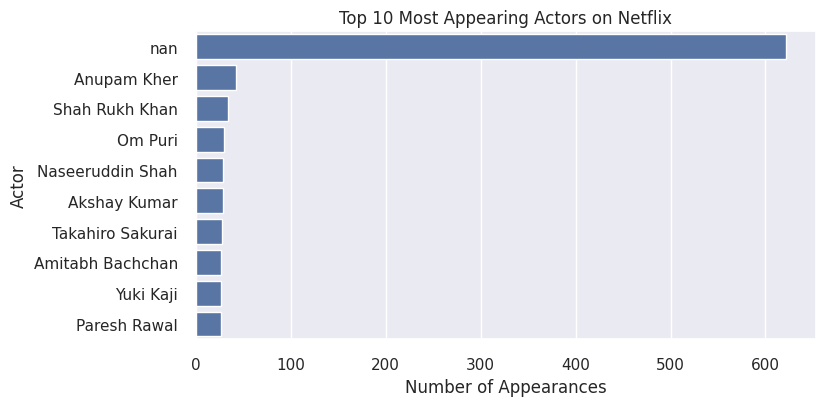

In [19]:
df['Cast'] = df['Cast'].astype(str)
actors = df['Cast'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=actors.values, y=actors.index)
plt.title("Top 10 Most Appearing Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.show()


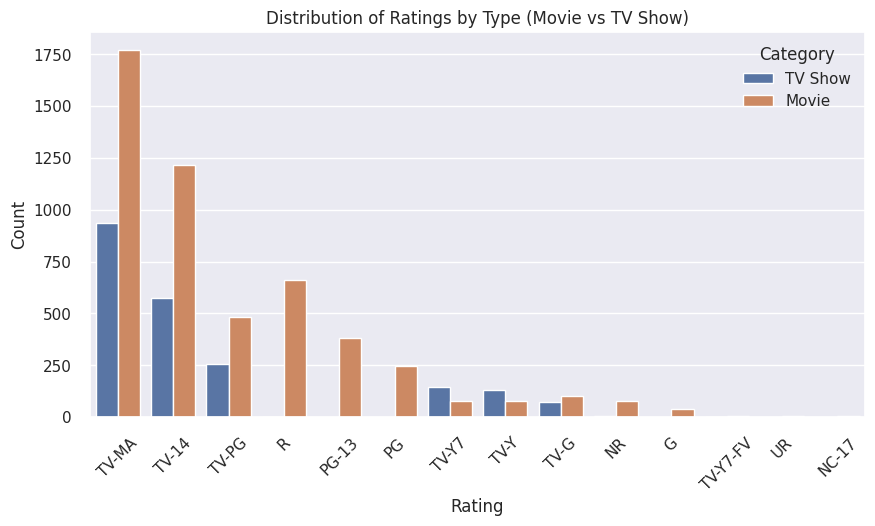

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Rating', hue='Category', data=df, order=df['Rating'].value_counts().index)
plt.title("Distribution of Ratings by Type (Movie vs TV Show)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


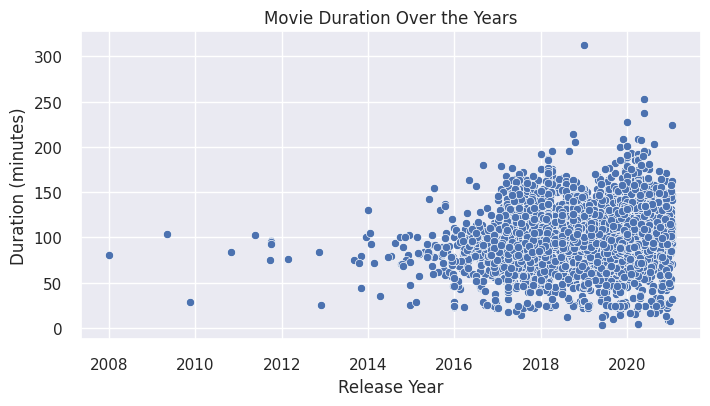

In [21]:
movies = df[df['Category'] == 'Movie'].copy()
movies['Duration_Num'] = movies['Duration'].str.replace(' min','').astype(float)
plt.figure(figsize=(8,4))
sns.scatterplot(x='Release_Date', y='Duration_Num', data=movies)
plt.title("Movie Duration Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.show()


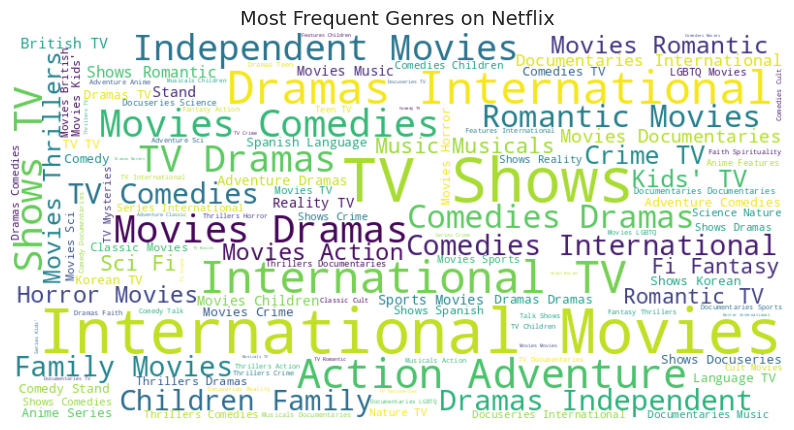

In [22]:
from wordcloud import WordCloud

text = " ".join(df['Type'].dropna().astype(str))
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Genres on Netflix", fontsize=14)
plt.show()


In [23]:
print("📊 Netflix Dataset Summary Insights:\n")
print(f"Total Titles: {len(df)}")
print(f"Movies: {len(df[df['Category']=='Movie'])}")
print(f"TV Shows: {len(df[df['Category']=='TV Show'])}")
print(f"\nTop Country: {df['Country'].value_counts().idxmax()}")
print(f"Most Common Genre: {df['Type'].str.split(',').explode().value_counts().idxmax()}")
print(f"Most Frequent Director: {df['Director'].value_counts().idxmax()}")
print(f"Most Frequent Actor: {df['Cast'].str.split(',').explode().value_counts().idxmax()}")
print("\n✅ Insight: Netflix has a higher number of Movies than TV Shows, with the U.S. dominating in content production. Popular genres tend to be International Dramas and Comedies. This shows Netflix’s focus on global and diverse storytelling.")


📊 Netflix Dataset Summary Insights:

Total Titles: 7267
Movies: 5145
TV Shows: 2122

Top Country: United States
Most Common Genre:  International Movies
Most Frequent Director: Raúl Campos, Jan Suter
Most Frequent Actor: nan

✅ Insight: Netflix has a higher number of Movies than TV Shows, with the U.S. dominating in content production. Popular genres tend to be International Dramas and Comedies. This shows Netflix’s focus on global and diverse storytelling.
